In [2]:
import pickle
with open("finalset/datasets_og.pickle",'rb') as handle:
    [X_train,Y_train,X_test,Y_test] = pickle.load(handle)
    print("g")
print("d")

g
d


In [3]:
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(4800, 98, 37)

(1787, 98, 37)

(4800, 1)

(1787, 1)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [6]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_train.shape

(4800, 3626)

In [7]:
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
X_test.shape

(1787, 3626)

In [10]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train,norm='l2')
X_test = normalize(X_test,norm='l2')

In [11]:
from sklearn.metrics import accuracy_score
import time
clf = LogisticRegression(C=0.0001,class_weight='balanced',max_iter=1500,tol=0.00001)
old_ticks = time.time()
clf.fit(X_train,Y_train)
new_ticks = time.time()
print(new_ticks - old_ticks)
old_ticks = time.time()
pred = clf.predict(X_test)
new_ticks = time.time()
print(new_ticks - old_ticks)
accuracy_score(pred,Y_test)

/home/yoda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yoda/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.32142043113708496
0.016106128692626953


0.5808617795187465

In [13]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5409624663267927

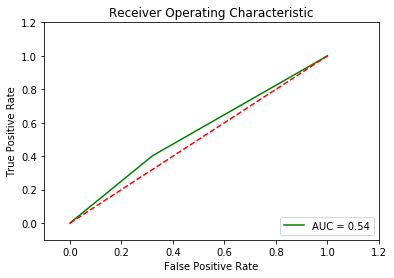

In [14]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
y_train = Y_train
y_test = Y_test

In [20]:
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=5)
old_ticks = time.time()
clf1.fit(X_train,Y_train)
new_ticks = time.time()
print(new_ticks - old_ticks)
old_ticks = time.time()
pred1 = clf1.predict(X_test)
new_ticks = time.time()
print(new_ticks - old_ticks)
accuracy_score(pred1,Y_test)

11.898333549499512
0.01159977912902832


0.5567991046446559

In [21]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred1)
roc_aucs = auc(false_positive_rate, true_positive_rate)
roc_aucs

0.5229865744307657

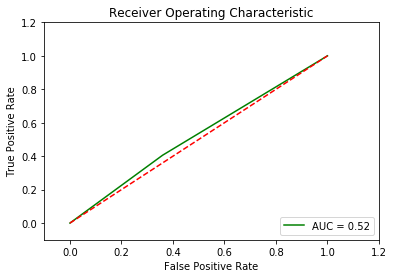

In [22]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_aucs)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
clf2 = RandomForestClassifier(min_samples_leaf=5,max_depth=25)
old_ticks = time.time()
clf2.fit(X_train,y_train)
new_ticks = time.time()
print (new_ticks - old_ticks)
old_ticks = time.time()
pred2 = clf2.predict(X_test)
new_ticks = time.time()
print (new_ticks - old_ticks)
accuracy_score(pred2,y_test)

/home/yoda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yoda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.464151382446289
0.032068490982055664


0.6049244543928372

In [26]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred2)
roc_aucss = auc(false_positive_rate, true_positive_rate)
roc_aucss

0.5293906310618604

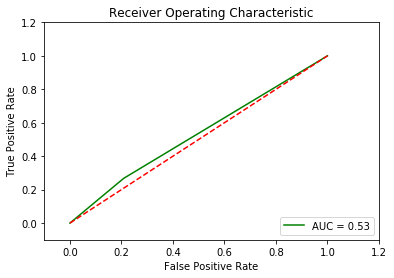

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_aucss)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
from sklearn import svm
clf3 = svm.SVC(kernel='poly',gamma=0.3,C=30,degree=2,tol=1e-6,max_iter=1000,probability=True)
old_ticks = time.time()
clf3.fit(X_train,y_train)
new_ticks = time.time()
print (new_ticks - old_ticks)
old_ticks = time.time()
pred3 = clf3.predict(X_test)
new_ticks = time.time()
print (new_ticks - old_ticks)
accuracy_score(pred3,y_test)

/home/yoda/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yoda/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


267.1499478816986
15.842771053314209


0.5937325125909345

In [29]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred3)
roc_aucss = auc(false_positive_rate, true_positive_rate)
roc_aucss

0.5375869492757187

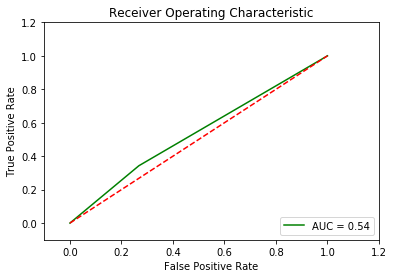

In [30]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_aucss)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()